In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Client Results On Testing Data

In [2]:
aDF = pd.read_csv("Results/as.csv")
vDF = pd.read_csv("Results/v.csv")
mlDF = pd.read_csv("Results/ml.csv")
aDF = aDF.drop("Unnamed: 0",axis=1)
vDF = vDF.drop("Unnamed: 0",axis=1)
mlDF = mlDF.drop("Unnamed: 0",axis=1)

df = pd.DataFrame()
df["Vanilla Federated Learning"] = vDF["Testing Results"]
df["Asynchronous Weight Updating Federated Learning"] =  aDF["Testing Results"]
df["Mutual Learning Federated Learning"] =  mlDF["Testing Results"]

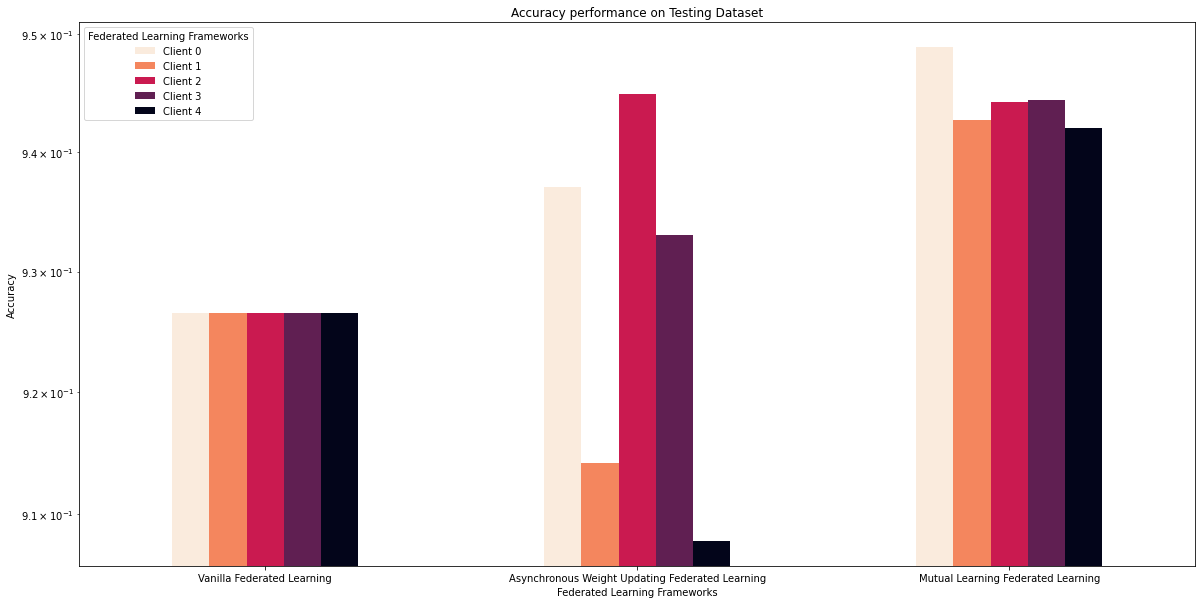

In [4]:
df.index = ["Client "+str(i) for i in range(5)]
ndf = pd.DataFrame(np.array(df).transpose(),columns = ["Client "+str(i) for i in range(5)])
ndf.index = df.columns
plt.rc('legend',fontsize=10) # using a size in points
fig,axs = plt.subplots(1,1,figsize = (20,10))   

ndf.plot(logy=True,kind="bar",y=["Client "+str(i) for i in range(5)],colormap="rocket_r",rot=0,ax=axs,title="Accuracy performance on Testing Dataset")
axs.get_legend().set_title("Federated Learning Frameworks")

plt.xlabel("Federated Learning Frameworks")
plt.ylabel("Accuracy")

# plt.savefig("Figs/testing.png")
plt.show()

In [7]:
ndf.round(decimals=4).multiply(100).to_csv("Figs/test.csv")

# Training History

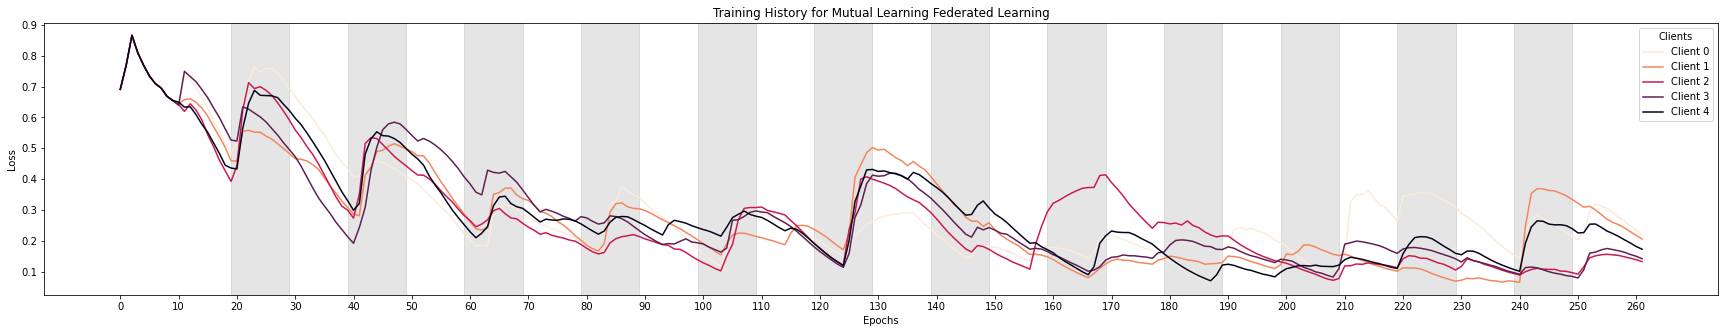

In [120]:
mlLoss = pd.read_csv("Results/mlLoss.csv")
mlLoss = mlLoss.ewm(alpha=0.1).mean()
plt.rc('legend',fontsize=10) # using a size in points
fig,axs = plt.subplots(1,1,figsize = (30,5))   

mlLoss.plot(kind="line",y=["Client "+str(i) for i in range(5)],colormap="rocket_r",ax=axs,title="Training History for Mutual Learning Federated Learning")
axs.get_legend().set_title("Clients")
plt.xlabel("Epochs")
plt.xticks(list(range(0,len(mlLoss),10)))
for i in range(12):
    axs.axvspan(19+(i*20),29+(i*20), alpha=0.1, color='black')

plt.ylabel("Loss")
plt.savefig("Figs/mlLoss.png")

In [110]:
for i in range(12):
    if (i+1)%3==0:
        print(20+(20*(i)),30+(20*(i)),"deep")
    else:
        print(20+(20*(i)),30+(20*(i)),"shallow")

20 30 shallow
40 50 shallow
60 70 deep
80 90 shallow
100 110 shallow
120 130 deep
140 150 shallow
160 170 shallow
180 190 deep
200 210 shallow
220 230 shallow
240 250 deep


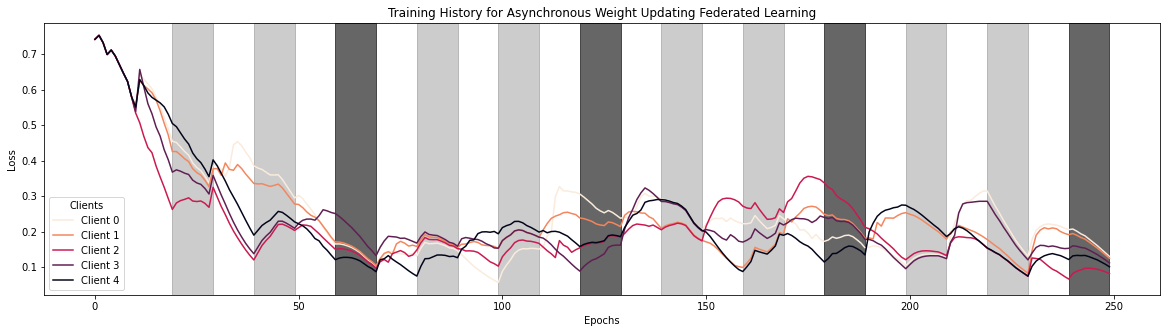

In [119]:
mlLoss = pd.read_csv("Results/asLoss.csv")
mlLoss = mlLoss.ewm(alpha=0.1).mean()
plt.rc('legend',fontsize=10) # using a size in points
fig,axs = plt.subplots(1,1,figsize = (20,5))   

mlLoss.plot(kind="line",y=["Client "+str(i) for i in range(5)],colormap="rocket_r",rot=0,ax=axs,title="Training History for Asynchronous Weight Updating Federated Learning")
axs.get_legend().set_title("Clients")
for i in range(12):
    if (i+1)%3==0:
        axs.axvspan(19+(20*(i)),29+(20*(i)),alpha=0.6,color='black')
    else:
        axs.axvspan(19+(20*(i)),29+(20*(i)), alpha=0.2,color='black')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Figs/asLoss.png")

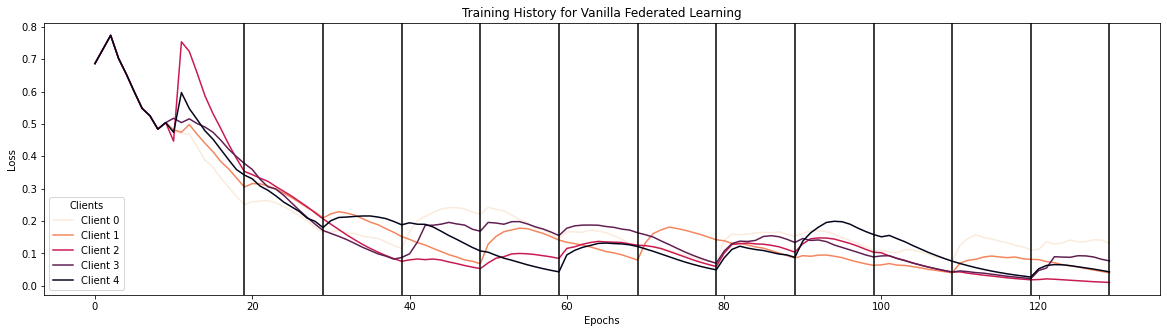

In [118]:
mlLoss = pd.read_csv("Results/vLoss.csv")
mlLoss = mlLoss.ewm(alpha=0.1).mean()
plt.rc('legend',fontsize=10) # using a size in points
fig,axs = plt.subplots(1,1,figsize = (20,5))   

mlLoss.plot(kind="line",y=["Client "+str(i) for i in range(5)],colormap="rocket_r",rot=0,ax=axs,title="Training History for Vanilla Federated Learning")
for i in range(12):
    axs.axvline(x = 19 + (i*10), color = 'black', label = 'Weight Sharing')
axs.get_legend().set_title("Clients")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Figs/vLoss.png")